<a href="https://colab.research.google.com/github/allalena/ml_projects/blob/development/Thinkful_supervised_ml_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised ML Capstone

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import io
import seaborn as sns
from scipy import stats
import plotly.express as plotly

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score


In [ ]:
# Read the csv file
df = pd.read_csv('https://raw.githubusercontent.com/allalena/demo1/main/Telco-Customer-ChurnCustomer-Churn.csv')

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
# Display the list of columns
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

# Exploratory Data Analysis

In [ ]:
df.shape

(7043, 21)

In [ ]:
# Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
# columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##**Checking for nulls**

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can see from the above, there are no nulls in the datset

In [ ]:
# convert the total charges to numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
# Check for nulls again
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see after converting the total charges into numeric, we can see that it has 11 nulls.


It was noted from the descriptive statistics above that there are 0 tenure values. It worth an investigation


In [ ]:
# df wehere tenure is 0
df[df['tenure'] == 0].count()

customerID          11
gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges         0
Churn               11
dtype: int64

In [ ]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We can see from the above dataframe that there are 0 tenure values eventhough  monthly charges exist. So it is better if we delete these rows where tenure is 0.

In [ ]:
# Drop rows where tenure is 0
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)


In [ ]:
df[df['tenure'] == 0].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Since total charges has 11 nulls, I decided to drop them.

In [ ]:
# convert total charges to float64
df['TotalCharges'] = df['TotalCharges'].astype(np.float64)

In [ ]:
# Drop total charges nulls
df = df.dropna(subset=['TotalCharges'])

In [ ]:
# Check for nulls in the data set again
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


As we can see from the above, there are no nulls in the dataset

## Check for duplicates

In [ ]:
# Check for duplicates in the dataset
df.duplicated().value_counts()

False    7032
dtype: int64

As we can see we have 42 dups we need to remove.

In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Check for dups again
df.duplicated().value_counts()

False    7032
dtype: int64

As we can see from the above all dups have been removed

No     5163
Yes    1869
Name: Churn, dtype: int64


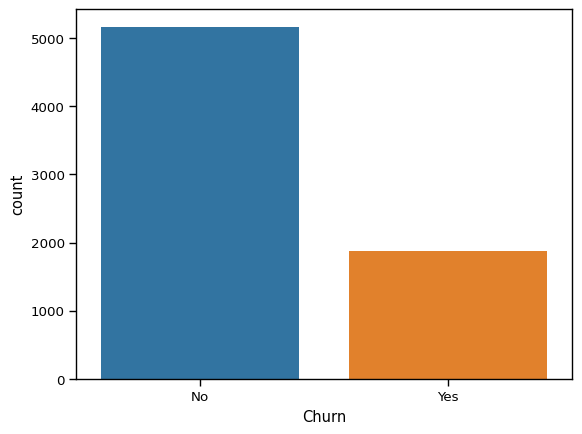

In [ ]:
# Countplot of churn feature - Churn distribution
print(df.Churn.value_counts())
sns.countplot(data=df, x='Churn');

We can see from the count plot above that the data is umbalanced. So I need to balance the data before modeling. I will use SMOTE to balance the target variable.

***Data Visualization***

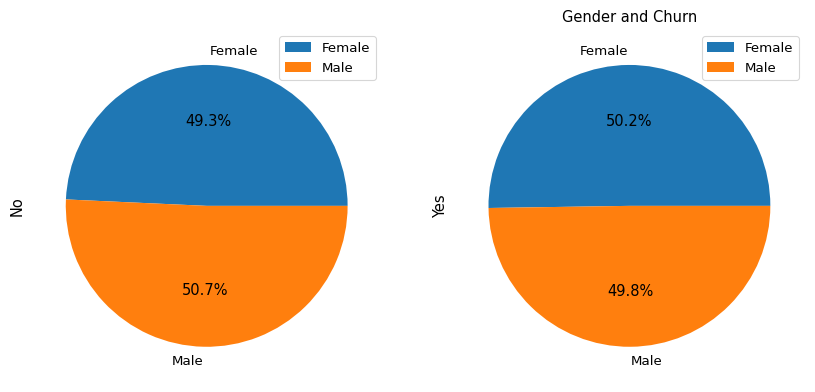

In [ ]:
# Create a pie chart of the gender and churn add percentages
df.groupby(['gender','Churn']).size().unstack().plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(10,10));

# title
plt.title('Gender and Churn');





50.2 % of churners are females and 49.8% are males. there is a negligible diffrence, thus Both genders behaved in similar fashion.

In [ ]:
# Count of non churners by gender
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [ ]:
# Count of churners by gender
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

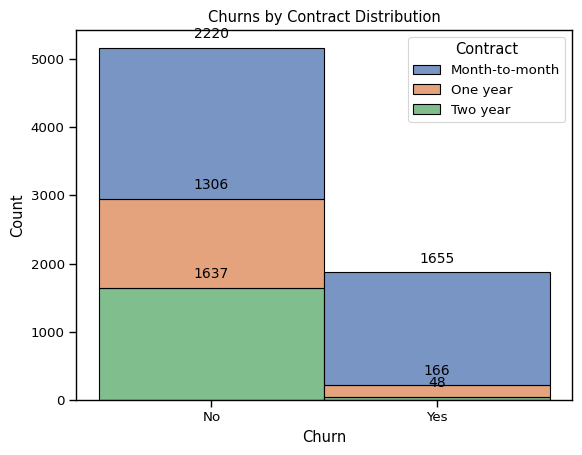

In [ ]:
# Churns by contract distribution
plt.clf()
ax = sns.histplot(data=df, x="Churn", hue="Contract", bins=10, multiple="stack", palette="deep");
ax.set_title("Churns by Contract Distribution");
cumulative_heights = {}

# Iterate through the patches (bars)
for p in ax.patches:
    # Extract information
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = int(p.get_height())

    # Calculate the cumulative height
    if x not in cumulative_heights:
        cumulative_heights[x] = y
    else:
        cumulative_heights[x] += label
        y = cumulative_heights[x]

    # Add annotation
    ax.annotate(f'{label}', (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
df[df["Contract"] == "Month-to-month"].count()

customerID          3875
gender              3875
SeniorCitizen       3875
Partner             3875
Dependents          3875
tenure              3875
PhoneService        3875
MultipleLines       3875
InternetService     3875
OnlineSecurity      3875
OnlineBackup        3875
DeviceProtection    3875
TechSupport         3875
StreamingTV         3875
StreamingMovies     3875
Contract            3875
PaperlessBilling    3875
PaymentMethod       3875
MonthlyCharges      3875
TotalCharges        3875
Churn               3875
dtype: int64

In [ ]:
df[df["Contract"] == "One year"].count()

customerID          1472
gender              1472
SeniorCitizen       1472
Partner             1472
Dependents          1472
tenure              1472
PhoneService        1472
MultipleLines       1472
InternetService     1472
OnlineSecurity      1472
OnlineBackup        1472
DeviceProtection    1472
TechSupport         1472
StreamingTV         1472
StreamingMovies     1472
Contract            1472
PaperlessBilling    1472
PaymentMethod       1472
MonthlyCharges      1472
TotalCharges        1472
Churn               1472
dtype: int64

In [ ]:
df[df["Contract"] == "Two year"].count()

customerID          1685
gender              1685
SeniorCitizen       1685
Partner             1685
Dependents          1685
tenure              1685
PhoneService        1685
MultipleLines       1685
InternetService     1685
OnlineSecurity      1685
OnlineBackup        1685
DeviceProtection    1685
TechSupport         1685
StreamingTV         1685
StreamingMovies     1685
Contract            1685
PaperlessBilling    1685
PaymentMethod       1685
MonthlyCharges      1685
TotalCharges        1685
Churn               1685
dtype: int64

43% of customers with Month-to-Month Contract opted out and 11% of customrs with One Year Contract and about 3% with Two Year Contract.


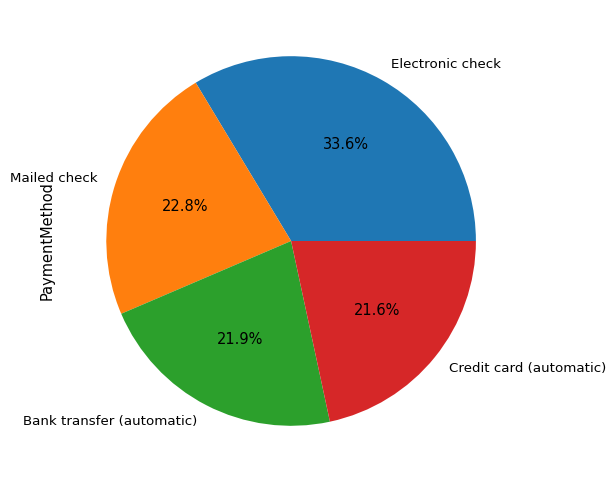

In [ ]:
# Show payment method distribution in pie chart
df.PaymentMethod.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6));


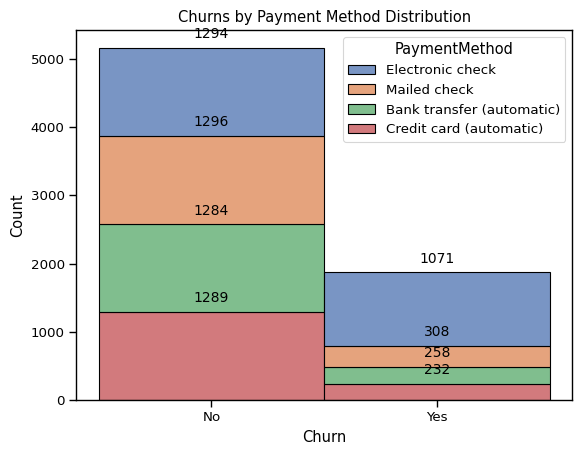

In [ ]:
ax = sns.histplot(df, x="Churn", hue="PaymentMethod", multiple="stack", palette="deep")
ax.set_title("Churns by Payment Method Distribution");
cumulative_heights = {}

# Iterate through the patches (bars)
for p in ax.patches:
    # Extract information
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = int(p.get_height())

    # Calculate the cumulative height
    if x not in cumulative_heights:
        cumulative_heights[x] = y
    else:
        cumulative_heights[x] += label
        y = cumulative_heights[x]

    # Add annotation
    ax.annotate(f'{label}', (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


From the hist plot above, most churners payed using electronic checks. Customers who paid using bank transfer or mailed check are less likely to churn

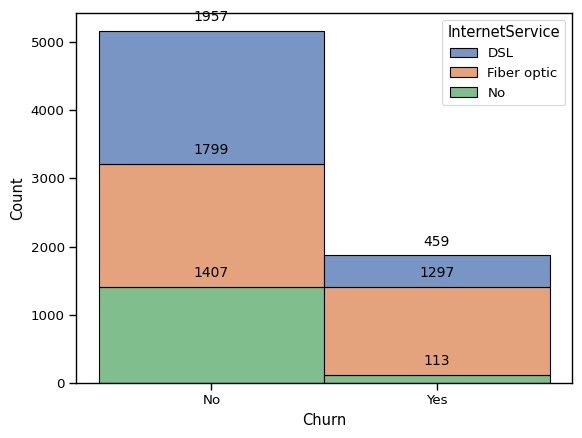

In [ ]:
# Churn Distribution of Internet Service and Gender
plt.clf()
ax = sns.histplot(data=df, x="Churn", hue="InternetService", multiple="stack", palette="deep");
# Initialize a dictionary to store the cumulative height
cumulative_heights = {}

# Iterate through the patches (bars)
for p in ax.patches:
    # Extract information
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = int(p.get_height())

    # Calculate the cumulative height
    if x not in cumulative_heights:
        cumulative_heights[x] = y
    else:
        cumulative_heights[x] += label
        y = cumulative_heights[x]

    # Add annotation
    ax.annotate(f'{label}', (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

Several customers choose the Fiber optic internet service and it's also shown that the customers who use this service have high churn rate, this is an indication that they are dissatisfied with this type of service.<br>
Also, customers with DSL service are the majority in numbers and also have less churn rate when compared to Fibre optic service customers.

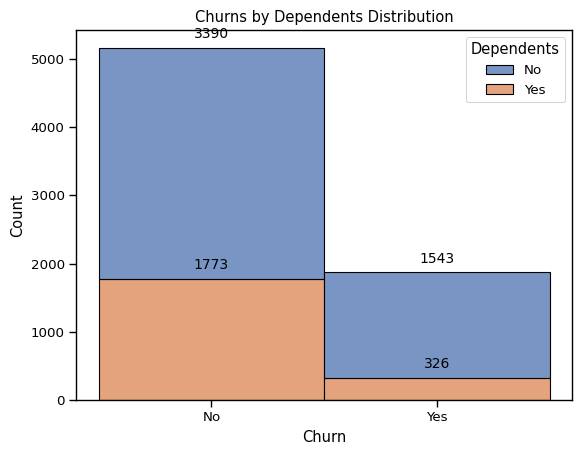

In [ ]:
# show the dependents distribution
plt.clf()
ax = sns.histplot(data=df, x="Churn", hue="Dependents", multiple="stack", palette="deep");
ax.set_title("Churns by Dependents Distribution");
cumulative_heights = {}

# Iterate through the patches (bars)
for p in ax.patches:
    # Extract information
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = int(p.get_height())

    # Calculate the cumulative height
    if x not in cumulative_heights:
        cumulative_heights[x] = y
    else:
        cumulative_heights[x] += label
        y = cumulative_heights[x]

    # Add annotation
    ax.annotate(f'{label}', (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

The above histplot showns that Customers wit no dependents are more likely to churn.

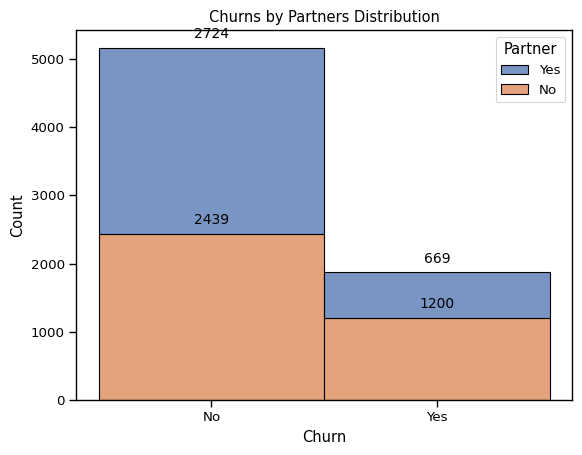

In [ ]:
# Show the Partners distribution
plt.clf()
ax = sns.histplot(data=df, x="Churn", hue="Partner", multiple="stack", palette="deep");
ax.set_title("Churns by Partners Distribution");
cumulative_heights = {}

# Iterate through the patches (bars)
for p in ax.patches:
    # Extract information
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = int(p.get_height())

    # Calculate the cumulative height
    if x not in cumulative_heights:
        cumulative_heights[x] = y
    else:
        cumulative_heights[x] += label
        y = cumulative_heights[x]

    # Add annotation
    ax.annotate(f'{label}', (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


From the above distribution plot, we can see that customers without partners are more likely to churn

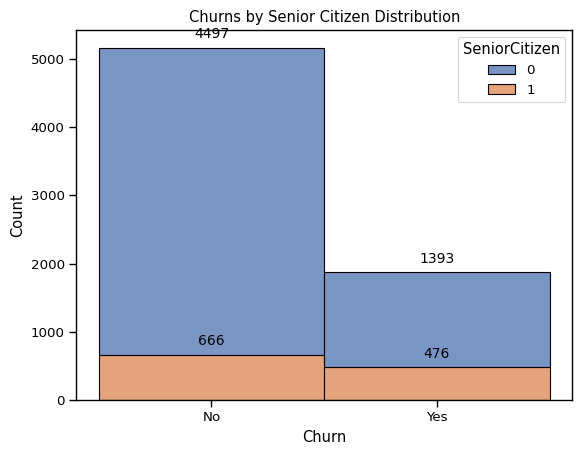

In [ ]:
# Show the Senior Citizen distribution
plt.clf()
ax = sns.histplot(data=df, x="Churn", hue="SeniorCitizen", multiple="stack", palette="deep");
ax.set_title("Churns by Senior Citizen Distribution");
cumulative_heights = {}

# Iterate through the patches (bars)
for p in ax.patches:
    # Extract information
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = int(p.get_height())

    # Calculate the cumulative height
    if x not in cumulative_heights:
        cumulative_heights[x] = y
    else:
        cumulative_heights[x] += label
        y = cumulative_heights[x]

    # Add annotation
    ax.annotate(f'{label}', (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

From the above distribution, there is a small population of senior citizens customers and the about 41% of it churned

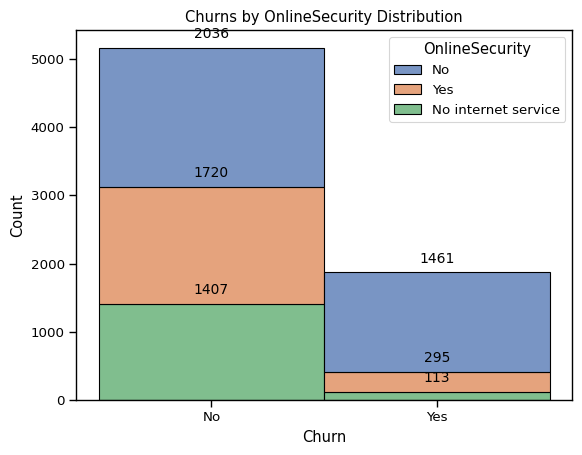

In [ ]:
# Show the OnlineSecurity distribution
plt.clf()
ax = sns.histplot(data=df, x="Churn", hue="OnlineSecurity", multiple="stack", palette="deep");
ax.set_title("Churns by OnlineSecurity Distribution");

cumulative_heights = {}

# Iterate through the patches (bars)
for p in ax.patches:
    # Extract information
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = int(p.get_height())

    # Calculate the cumulative height
    if x not in cumulative_heights:
        cumulative_heights[x] = y
    else:
        cumulative_heights[x] += label
        y = cumulative_heights[x]

    # Add annotation
    ax.annotate(f'{label}', (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

From the distribution above, most customers churns when there is no online security

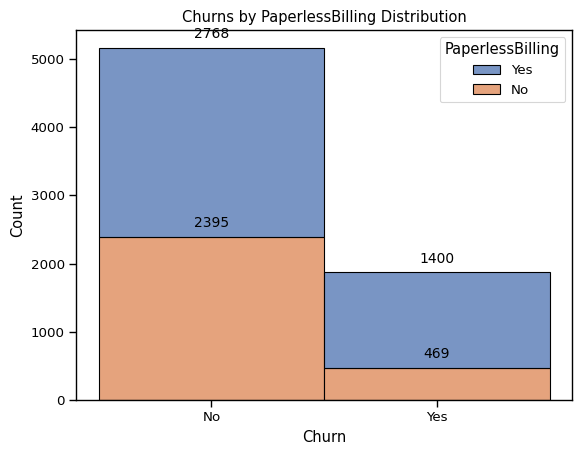

In [ ]:
# Show the distribution of PaperlessBilling
plt.clf()
ax = sns.histplot(data=df, x="Churn", hue="PaperlessBilling", multiple="stack", palette="deep");
ax.set_title("Churns by PaperlessBilling Distribution");

cumulative_heights = {}

# Iterate through the patches (bars)
for p in ax.patches:
    # Extract information
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = int(p.get_height())

    # Calculate the cumulative height
    if x not in cumulative_heights:
        cumulative_heights[x] = y
    else:
        cumulative_heights[x] += label
        y = cumulative_heights[x]

    # Add annotation
    ax.annotate(f'{label}', (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


From the above distribution, customers with Paperless Billing are most likely to churn

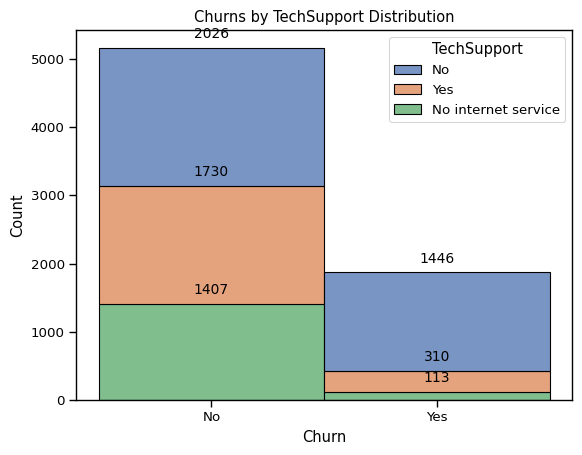

In [ ]:
# Show the distribution of TechSupport
plt.clf()
ax = sns.histplot(data=df, x="Churn", hue="TechSupport", multiple="stack", palette="deep");
ax.set_title("Churns by TechSupport Distribution");

cumulative_heights = {}

# Iterate through the patches (bars)
for p in ax.patches:
    # Extract information
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = int(p.get_height())

    # Calculate the cumulative height
    if x not in cumulative_heights:
        cumulative_heights[x] = y
    else:
        cumulative_heights[x] += label
        y = cumulative_heights[x]

    # Add annotation
    ax.annotate(f'{label}', (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

From the above distribution, we can see that customers with no TechSupport are most likely to churn.

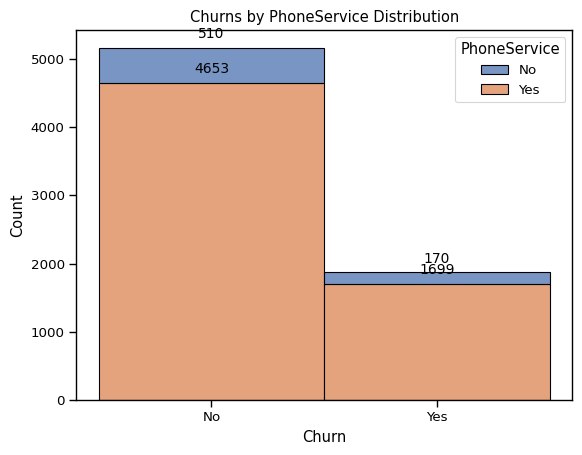

In [ ]:
# Show the distribution of PhoneService
plt.clf()
ax = sns.histplot(data=df, x="Churn", hue="PhoneService", multiple="stack", palette="deep");
ax.set_title("Churns by PhoneService Distribution");

cumulative_heights = {}

# Iterate through the patches (bars)
for p in ax.patches:
    # Extract information
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    label = int(p.get_height())

    # Calculate the cumulative height
    if x not in cumulative_heights:
        cumulative_heights[x] = y
    else:
        cumulative_heights[x] += label
        y = cumulative_heights[x]

    # Add annotation
    ax.annotate(f'{label}', (x, y), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

Very small population of customers that don't have a phone service and out of it, more than a third are more likely to churn.

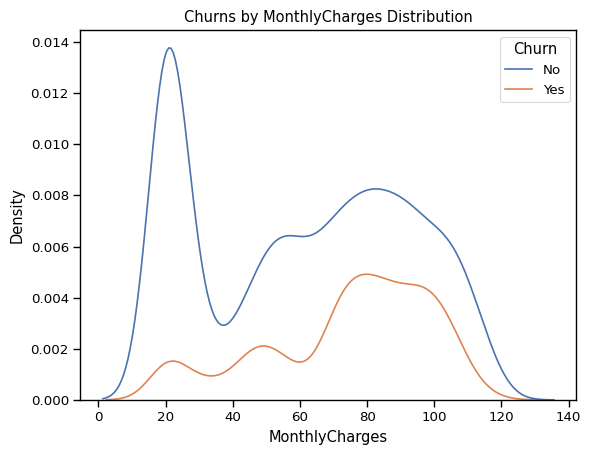

In [ ]:
# Show the distribution of monthly charges by churn
plt.clf()
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", palette="deep");
ax.set_title("Churns by MonthlyCharges Distribution");


It is apparent from the plot above that customers with higher Monthly Charges aremore likely to churn

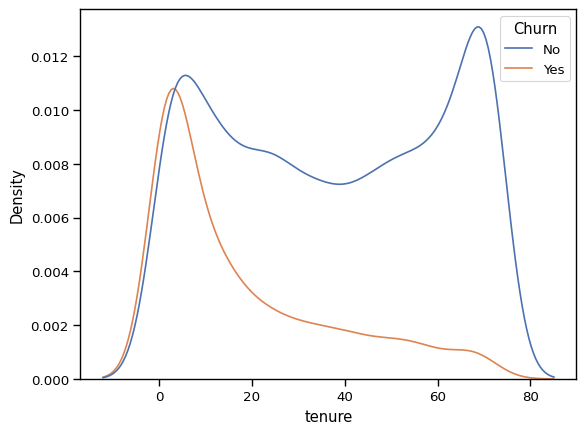

In [ ]:
# Show the the distribution of tenure vs churn
plt.clf()
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data=df, x="tenure", hue="Churn", palette="deep");


From the plot above new customers with average tenure of 10 months are more likely to churn. whereas customers with more tenure are more likely to stay.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


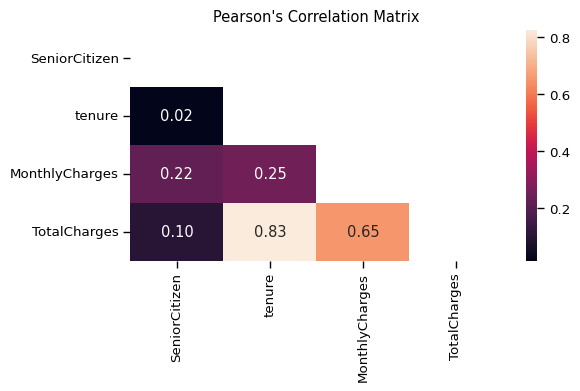

In [ ]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 3))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linecolor="c")
plt.title("Pearson's Correlation Matrix")
plt.show()

There is high correlation between Tenure and Total Charges, so I will only consider one feature in the modeling phase. Overall, there is no signs of Multicollinearity issues.

# **Data Preprocessing**

## OneHot Encoding

In [ ]:
# Create dummy variables
df = pd.get_dummies(data=df, columns= ['Contract', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'PaymentMethod', 'TechSupport','StreamingTV','StreamingMovies'],drop_first=True)

## Label Encoding Categorical columns

In [ ]:
cat_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Contract', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'PaymentMethod',
               'TechSupport','StreamingTV','StreamingMovies']

le = LabelEncoder()

for c in cat_columns:
  df[c] = le.fit_transform(df[c])

In [ ]:
# Label encode the target feature
df.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)

In [ ]:
# drop customerID
df.drop(columns = ['customerID'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  


In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.940557,0.948627,0.00,0.0000,1.000,2.0000,2.00
InternetService,7032.0,0.872582,0.737271,0.00,0.0000,1.000,1.0000,2.00
OnlineSecurity,7032.0,0.789249,0.859962,0.00,0.0000,1.000,2.0000,2.00
OnlineBackup,7032.0,0.905859,0.880394,0.00,0.0000,1.000,2.0000,2.00


As we can see from the above statistics, 3 features which are tenure, MonthlyCharges and TotalCharges need to be normalized before modeling to avoid any kind of bias towards them.

###**Normalization**

In [ ]:
# Normalize tenure, MonthlyCharges and TotalCharges
minmax_scale = MinMaxScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = minmax_scale.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.0,0.000000,1.000000,1.000000,1.0
SeniorCitizen,7032.0,0.162400,0.368844,0.0,0.000000,0.000000,0.000000,1.0
Partner,7032.0,0.482509,0.499729,0.0,0.000000,0.000000,1.000000,1.0
Dependents,7032.0,0.298493,0.457629,0.0,0.000000,0.000000,1.000000,1.0
tenure,7032.0,0.442560,0.345708,0.0,0.112676,0.394366,0.760563,1.0
PhoneService,7032.0,0.903299,0.295571,0.0,1.000000,1.000000,1.000000,1.0
MultipleLines,7032.0,0.940557,0.948627,0.0,0.000000,1.000000,2.000000,2.0
InternetService,7032.0,0.872582,0.737271,0.0,0.000000,1.000000,1.000000,2.0
OnlineSecurity,7032.0,0.789249,0.859962,0.0,0.000000,1.000000,2.000000,2.0
OnlineBackup,7032.0,0.905859,0.880394,0.0,0.000000,1.000000,2.000000,2.0


As we can see from the above stats, all feature are at the same scale after normalizing tenure, MonthlyCharges, and TotalCharges

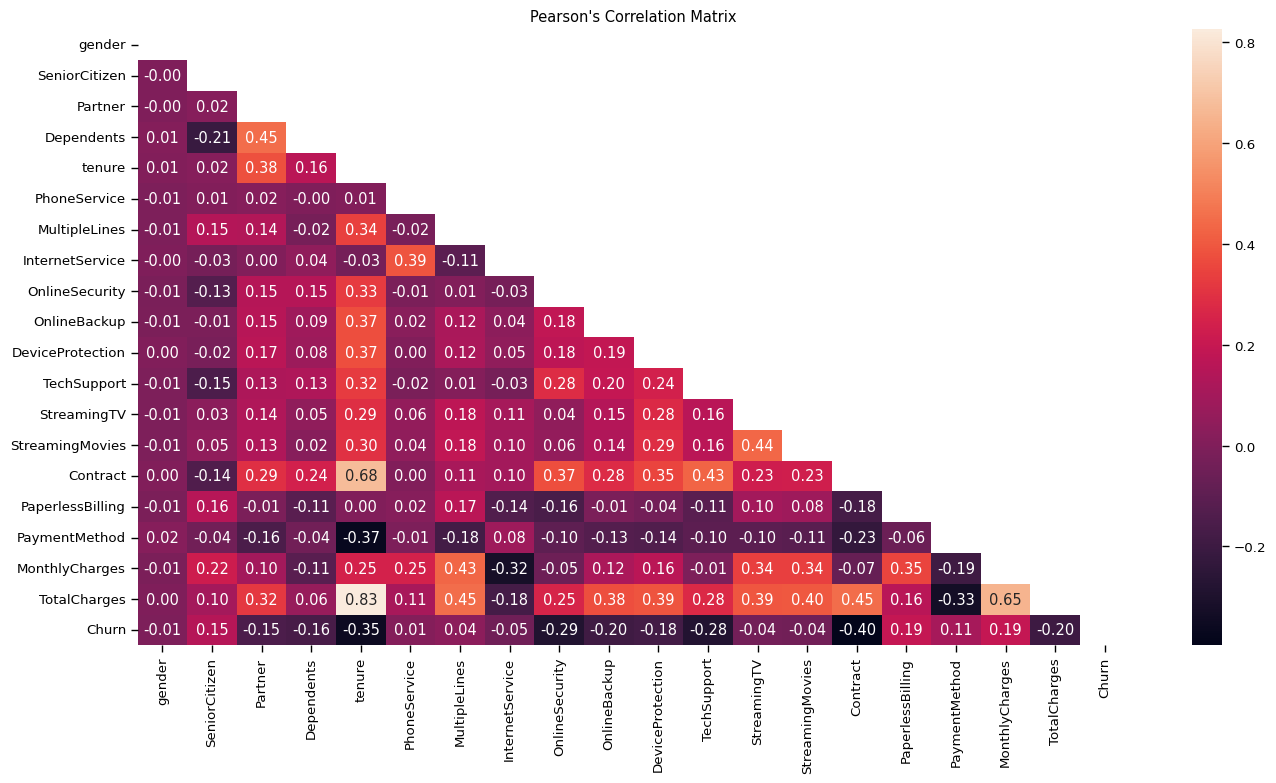

In [ ]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linecolor="c")
plt.title("Pearson's Correlation Matrix")
plt.show()

As we can see from the correlation matrix above, gender, PhoneService, MultipleLines, InternetService, StreamingTV and StreamingMovies show a very low correlation with churn. Thus, I will remove them from the dataset.

In [ ]:
# Drop low correlation features
df.drop(columns=['gender', 'PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies'], inplace = True)

In [ ]:
df.columns.to_list()

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

**Split the data and handle the umbalance issue using SMOTE**

In [ ]:
X = df.drop(columns = ['Churn'])   #.values
y = df['Churn']  #.values

In [ ]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

As we can see the target variable is umbalanced there are more no churn than churn observations in the data set. We will try to balance the dataset using SMOTE technique

In [ ]:
feature_names = np.array(df.columns)

column_to_drop = "Churn"

feature_names = np.array(feature_names)

# Create a boolean mask where True indicates the feature we want to keep
mask = feature_names != column_to_drop

# Apply this mask to feature_names to filter out the column
feature_names = feature_names[mask]

In [ ]:
smote = SMOTE(sampling_strategy = 1)

In [ ]:
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.20, random_state = 42, stratify=y_sm)

In [ ]:
y_test.value_counts(), y_train.value_counts()

(0    1033
 1    1033
 Name: Churn, dtype: int64,
 0    4130
 1    4130
 Name: Churn, dtype: int64)

# Modeling

In [ ]:
LR = LogisticRegression()
RF = RandomForestClassifier(n_estimators=100)
XGB = XGBClassifier()

In [ ]:
# Define the list a models
models = [LR, RF, XGB]
# Define the list of model evaluation metrics
recall =[]
precision = []
f1 = []
auc = []

auc_scores = []

LogisticRegression()  - Evaluation metrics:
[[725 308]
 [181 852]]
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1033
           1       0.73      0.82      0.78      1033

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066



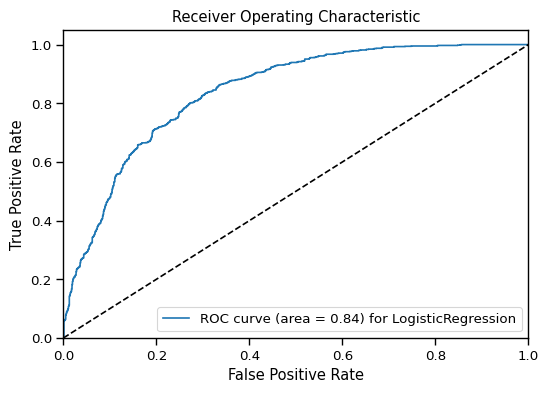

Recall: 0.8247821878025169
Precision: 0.7344827586206897
F1: 0.7770177838577291
AUC: 0.7633107454017424
*********************************************************************


RandomForestClassifier()  - Evaluation metrics:
[[807 226]
 [169 864]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1033
           1       0.79      0.84      0.81      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



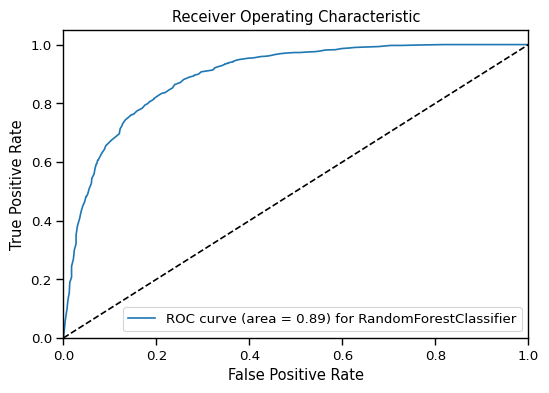

Recall: 0.8363988383349468
Precision: 0.7926605504587156
F1: 0.8139425341497881
AUC: 0.808809293320426
*********************************************************************


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)  - Evaluation metrics:
[[773 260]
 [157 876]]
              precisi

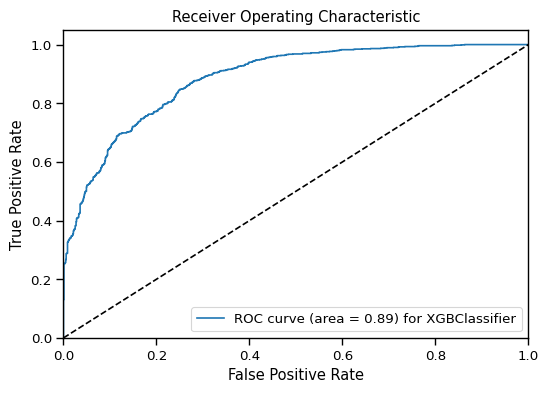

Recall: 0.8480154888673765
Precision: 0.7711267605633803
F1: 0.8077455048409405
AUC: 0.7981606969990319
*********************************************************************




In [ ]:
from sklearn.metrics import roc_curve, auc
for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    #confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    print(model, " - Evaluation metrics:")
    print(matrix)
    print(classification_report(y_test, y_pred))

    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

    # AUC and ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Plotting ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}) for {model.__class__.__name__}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred))
    print('AUC:', roc_auc_score(y_test, y_pred))
    print("*********************************************************************")
    print("\n")


As we can see from the evaluation metrics reports above that Random forest gave better performance followed by xgboost model. This results are extracted before doing any hyper parameter tuning of feture selection. In the next step, I will envolve feature selection and hyper parameter tuning and check the model's performance again.

# Feature Importance


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

# Assuming X_train and y_train are already defined and preprocessed

# Define the models
LR = LogisticRegression()
RF = RandomForestClassifier(n_estimators=100)
XGB = XGBClassifier()

models = [LR, RF, XGB]
model_names = ['LogisticRegression', 'RandomForest', 'XGBClassifier']
feature_names = X_train.columns

# Iterate over the models to train them and get feature importances or coefficients
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)

    if name in ['RandomForest', 'XGBClassifier']:
        importances = model.feature_importances_
    elif name == 'LogisticRegression':
        importances = model.coef_[0]
    else:
        print(f"{name} does not have feature importances or coefficients.")
        continue

    # Sort the features by importance
    sorted_indices = np.argsort(importances)[::-1]

    # Print sorted feature importances with feature names
    print(f"{name} feature importances (sorted):")
    print("________________________________________________")
    for idx in sorted_indices:
        print(f"{feature_names[idx]}: {importances[idx]}")
    print("\n")
    print("")


LogisticRegression feature importances (sorted):
________________________________________________
MonthlyCharges: 2.169700610334141
TotalCharges: 2.0112763034465604
PaperlessBilling: 0.20629040948844332
SeniorCitizen: 0.043149959656986224
PaymentMethod: 0.01409340317920007
Partner: 0.004935479508570814
DeviceProtection: -0.002355348851319748
OnlineBackup: -0.14931436396309347
TechSupport: -0.25109474081164995
OnlineSecurity: -0.2654184156208511
Dependents: -0.5753585655997182
Contract: -1.1018338140090445
tenure: -3.2801893468245624



RandomForest feature importances (sorted):
________________________________________________
MonthlyCharges: 0.19605479576719778
tenure: 0.18122742840846542
TotalCharges: 0.17736635563576322
Contract: 0.14368089473029716
TechSupport: 0.05605682797966066
OnlineSecurity: 0.053818286112656
PaymentMethod: 0.05364465950096807
OnlineBackup: 0.03565089500072078
PaperlessBilling: 0.02293831723568947
Dependents: 0.021688104977828034
DeviceProtection: 0.02132101748

When analyzing the feature importance values for each model, we can conclude that for logistic regression absolute feature values above 0.2 are chosen to be important features. For Random Forest and XGBoost top top 50% or top 6 features are selected.

## **Retrain the models with important features**

In [ ]:
# Selected Features
selected_features = ['TotalCharges', 'MonthlyCharges', 'Contract', 'tenure', 'OnlineSecurity', 'Dependents', 'TechSupport', 'PaymentMethod', 'PaperlessBilling', 'Churn']

In [ ]:
Xs = df[selected_features].drop(columns = ['Churn'])   #.values
ys = df[selected_features]['Churn']  #.values


feature_names = np.array(df[selected_features].columns)

column_to_drop = "Churn"

feature_names = np.array(feature_names)

# Create a boolean mask where True indicates the feature we want to keep
mask = feature_names != column_to_drop

# Apply this mask to feature_names to filter out the column
feature_names = feature_names[mask]

smote = SMOTE(sampling_strategy = 1)

Xs_sm, ys_sm = smote.fit_resample(Xs, ys)

#Train test split
X_train, X_test, y_train, y_test = train_test_split(Xs_sm, ys_sm, test_size = 0.20, random_state = 42, stratify=y_sm)

LogisticRegression()  - Evaluation metrics after feature selection:
[[719 314]
 [193 840]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1033
           1       0.73      0.81      0.77      1033

    accuracy                           0.75      2066
   macro avg       0.76      0.75      0.75      2066
weighted avg       0.76      0.75      0.75      2066



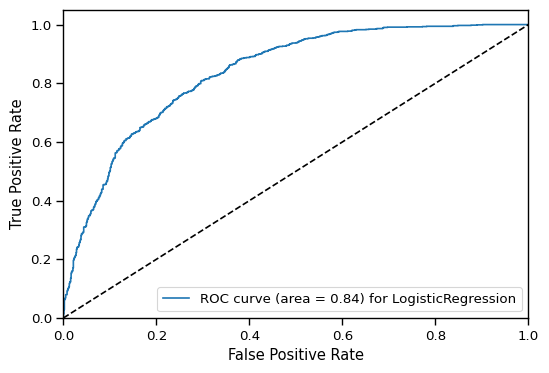

Recall: 0.8131655372700871
Precision: 0.7279029462738301
F1: 0.7681755829903978
AUC: 0.75459825750242
*********************************************************************


RandomForestClassifier()  - Evaluation metrics after feature selection:
[[805 228]
 [173 860]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1033
           1       0.79      0.83      0.81      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



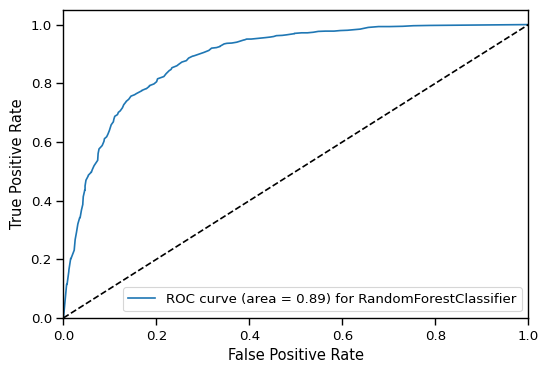

Recall: 0.8325266214908035
Precision: 0.7904411764705882
F1: 0.8109382366808109
AUC: 0.8059051306873185
*********************************************************************


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)  - Evaluation metrics after feature selection:
[[779 254]
 [167 86

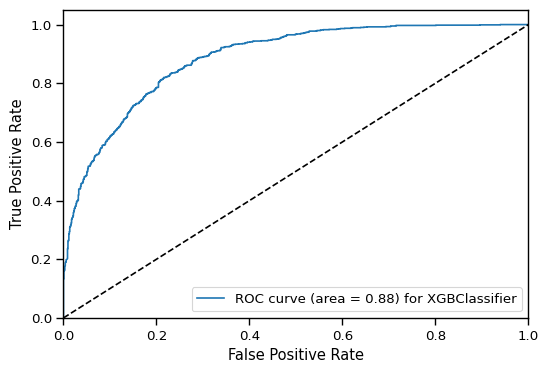

Recall: 0.8383349467570184
Precision: 0.7732142857142857
F1: 0.8044588945657223
AUC: 0.7962245885769602
*********************************************************************




In [ ]:
LR = LogisticRegression()
RF = RandomForestClassifier(n_estimators=100)
XGB = XGBClassifier()

# Define the list a models
models = [LR, RF, XGB]
# Define the list of model evaluation metrics
recall =[]
precision = []
f1 = []
auc = []
auc_scores = []


from sklearn.metrics import roc_curve, auc
for model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    #confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    print(model, " - Evaluation metrics after feature selection:")
    print(matrix)
    print(classification_report(y_test, y_pred))

    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

    # AUC and ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Plotting ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}) for {model.__class__.__name__}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred))
    print('AUC:', roc_auc_score(y_test, y_pred))
    print("*********************************************************************")
    print("\n")


Based on the results above after only choosing the important features, the models performance stayed the same. In this case we will keep the feature set obtained after the EDA and correlation analysis and feature selection.

## **Applying PCA**

In [ ]:
X = df.drop(columns = ['Churn'])   #.values
y = df['Churn']  #.values


feature_names = np.array(df.columns)

column_to_drop = "Churn"

feature_names = np.array(feature_names)

# Create a boolean mask where True indicates the feature we want to keep
mask = feature_names != column_to_drop

# Apply this mask to feature_names to filter out the column
feature_names = feature_names[mask]

smote = SMOTE(sampling_strategy = 1)

X_sm, y_sm = smote.fit_resample(X, y)

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.20, random_state = 42, stratify=y_sm)

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

LogisticRegression()  - Evaluation metrics after feature selection and PCA:
[[750 283]
 [313 720]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1033
           1       0.72      0.70      0.71      1033

    accuracy                           0.71      2066
   macro avg       0.71      0.71      0.71      2066
weighted avg       0.71      0.71      0.71      2066



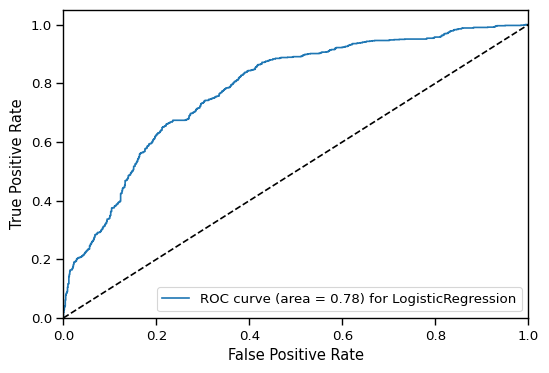

Recall: 0.6969990319457889
Precision: 0.7178464606181456
F1: 0.7072691552062867
AUC: 0.7115198451113263
*********************************************************************


RandomForestClassifier()  - Evaluation metrics after feature selection and PCA:
[[775 258]
 [204 829]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1033
           1       0.76      0.80      0.78      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



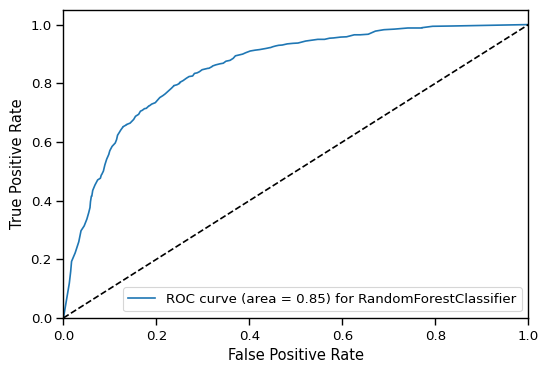

Recall: 0.8025169409486931
Precision: 0.7626494940202392
F1: 0.7820754716981132
AUC: 0.776379477250726
*********************************************************************


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)  - Evaluation metrics after feature selection and PCA:
[[733 300]
 

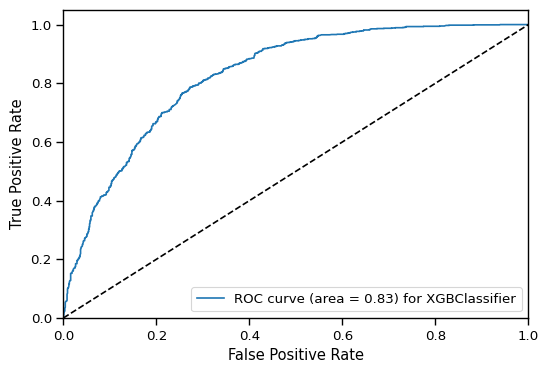

Recall: 0.7967086156824782
Precision: 0.7328584149599288
F1: 0.7634508348794063
AUC: 0.7531461761858663
*********************************************************************




In [ ]:
# Existing code for model evaluation
for model in models:
    model.fit(X_train_pca, y_train)  # Fit on PCA-transformed data

    y_pred = model.predict(X_test_pca)  # Predict using PCA-transformed data
    y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

    #confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    print(model, " - Evaluation metrics after feature selection and PCA:")
    print(matrix)
    print(classification_report(y_test, y_pred))

    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

    # AUC and ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    # Plotting ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}) for {model.__class__.__name__}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    print('Recall:', recall_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred))
    print('AUC:', roc_auc_score(y_test, y_pred))
    print("*********************************************************************")
    print("\n")


As we can see from the above, the performance of the models dropped after applying PCA. Therefore, since the the dataset is not considered dimentionally high and the number of features are not high, we will not use PCA.

## **Hyper Parameters Tuning**

## XGBoost with hyper parameter tuning (GridSearchCV)

In [ ]:
X = df.drop(columns = ['Churn'])   #.values
y = df['Churn']  #.values


feature_names = np.array(df.columns)

column_to_drop = "Churn"

feature_names = np.array(feature_names)

# Create a boolean mask where True indicates the feature we want to keep
mask = feature_names != column_to_drop

# Apply this mask to feature_names to filter out the column
feature_names = feature_names[mask]

smote = SMOTE(sampling_strategy = 1)

X_sm, y_sm = smote.fit_resample(X, y)

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.20, random_state = 42, stratify=y_sm)

## XGBoost Model

In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 10]
}

# Initialize XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Grid search
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='roc_auc', verbose=1)
grid_search_xgb.fit(X_train_pca, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [ ]:
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_


In [ ]:
print(f"XGBoost Best Params: {best_params_xgb}, Best Score: {best_score_xgb}")

XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}, Best Score: 0.8351041220854905


## Logistic Regression Model

In [ ]:
# Parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Grid search
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='roc_auc', verbose=1)
grid_search_lr.fit(X_train_pca, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters and scores for each model
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

In [ ]:
# Print results
print(f"Logistic Regression Best Params: {best_params_lr}, Best Score: {best_score_lr}")

Logistic Regression Best Params: {'C': 0.001, 'solver': 'liblinear'}, Best Score: 0.7268765133171913


## Random Forest Model

In [ ]:
# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest model
random_forest = RandomForestClassifier()

# Grid search
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='roc_auc', verbose=1)
grid_search_rf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

In [ ]:
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

In [ ]:
print(f"Random Forest Best Params: {best_params_rf}, Best Score: {best_score_rf}")

Random Forest Best Params: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}, Best Score: 0.778087167070218


## 1. Train Logistic Regression with Best Parameters

In [ ]:
# Initialize the Logistic Regression model with best parameters
best_log_reg = LogisticRegression(**grid_search_lr.best_params_)

# Train the model on the full training data
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=0.001, solver='liblinear')

Trained Logistic Regression Model:
LogisticRegression(C=0.001, solver='liblinear')
 - Evaluation metrics after feature selection and hyperparameter tuning (Logistic Regression):
[[729 304]
 [223 810]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.73      1033
           1       0.73      0.78      0.75      1033

    accuracy                           0.74      2066
   macro avg       0.75      0.74      0.74      2066
weighted avg       0.75      0.74      0.74      2066



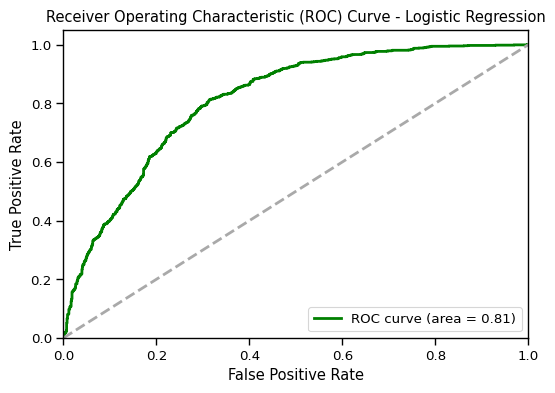

Recall: 0.7841239109390126
Precision: 0.7271095152603232
F1: 0.7545412203074057
AUC: 0.811103853567978
*********************************************************************


In [ ]:
# Predict using the test data for Logistic Regression
y_pred_lr = best_log_reg.predict(X_test)
y_pred_proba_lr = best_log_reg.predict_proba(X_test)[:, 1]

# Print model details for Logistic Regression
print("Trained Logistic Regression Model:")
# print the model with its parameters
print(best_log_reg)

# Confusion Matrix for Logistic Regression
matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(" - Evaluation metrics after feature selection and hyperparameter tuning (Logistic Regression):")
print(matrix_lr)

# Classification Report for Logistic Regression
report_lr = classification_report(y_test, y_pred_lr)
print(report_lr)

# Metrics for Logistic Regression
recall_lr = recall_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Plotting ROC Curve for Logistic Regression
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Print metrics for Logistic Regression
print(f"Recall: {recall_lr}")
print(f"Precision: {precision_lr}")
print(f"F1: {f1_lr}")
print(f"AUC: {auc_lr}")
print("*********************************************************************")


## 2. Train Random Forest with Best Parameters

In [ ]:
# Initialize the Random Forest model with best parameters
best_random_forest = RandomForestClassifier(**grid_search_rf.best_params_)

# Train the model on the full training data
best_random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=30, min_samples_split=5)

Trained Random Forest Model:
RandomForestClassifier(max_depth=30, min_samples_split=5)
 - Evaluation metrics after feature selection and hyperparameter tuning (Random Forest):
[[796 237]
 [171 862]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1033
           1       0.78      0.83      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



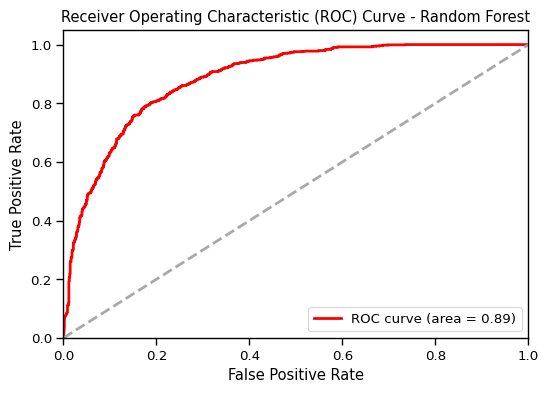

Recall: 0.8344627299128751
Precision: 0.7843494085532302
F1: 0.8086303939962475
AUC: 0.886649567186992
*********************************************************************


In [ ]:
# Predict using the test data for Random Forest
y_pred_rf = best_random_forest.predict(X_test)
y_pred_proba_rf = best_random_forest.predict_proba(X_test)[:, 1]

# Print model details for Random Forest
print("Trained Random Forest Model:")
# print the model with its parameters
print(best_random_forest)

# Confusion Matrix for Random Forest
matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(" - Evaluation metrics after feature selection and hyperparameter tuning (Random Forest):")
print(matrix_rf)

# Classification Report for Random Forest
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

# Metrics for Random Forest
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plotting ROC Curve for Random Forest
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Print metrics for Random Forest
print(f"Recall: {recall_rf}")
print(f"Precision: {precision_rf}")
print(f"F1: {f1_rf}")
print(f"AUC: {auc_rf}")
print("*********************************************************************")


## 3. Train XGBoost with Best Parameters

In [ ]:
# Initialize the XGBoost model with best parameters
best_xgb = XGBClassifier(**grid_search_xgb.best_params_)

# Train the model on the full training data
best_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Trained XGBoost Model:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
 - Evaluation metrics after feature selection and hyper parameter tuning:
[[784 249]
 [164 869]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1033
           1     

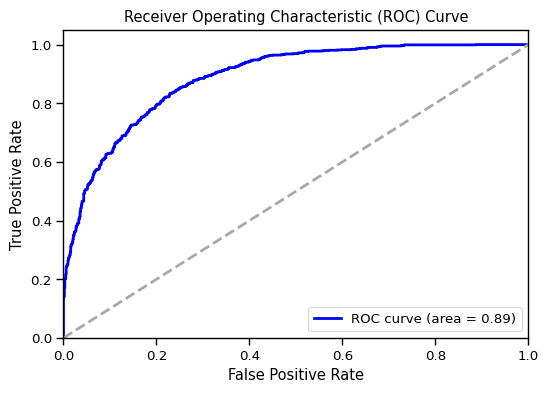

Recall: 0.8412391093901258
Precision: 0.7772808586762076
F1: 0.807996280799628
AUC: 0.8870108303993389
*********************************************************************


In [ ]:
# Predict using the test data
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Print model details
print("Trained XGBoost Model:")
# print the model with its parameters
print(best_xgb)

# Confusion Matrix
matrix = confusion_matrix(y_test, y_pred)
print(" - Evaluation metrics after feature selection and hyper parameter tuning:")
print(matrix)

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

# Metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print metrics
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1: {f1}")
print(f"AUC: {auc}")
print("*********************************************************************")


So after the hyper parameter tuning and traing the models with the new parameters, the evaluation metrics stayed the same as before the hyper parameter tuning. Logistic Regression AUC score improved from  0.75 to 0.81<br>

**Results (AUC | F1-Score):**

Logistic Regression: 0.81 | 0.75  <br>
Random Forest: 0.88 | 0.80 <br>
XGBoost: 0.88 | 0.80


## **Analysis** <br>
**XGBoost vs. Random Forest:** <br>
The XGBoost and Random Forest models are very close in performance across all metrics. Both have the same accuracy, precision, F1 score, and AUC. XGBoost has a slightly higher recall.<br>
**XGBoost vs. Logistic Regression:** <br>
XGBoost outperforms the Logistic Regression model in every metric.<br>
**Random Forest vs. Logistic Regression:** <br>Similarly, the Random Forest model outperforms the Logistic Regression in all metrics.

##**Best Model** <br>
**Overall Performance:**<br>
Both XGBoost and Random Forest models show very strong and comparable performance across all metrics. However, XGBoost has a slight edge in recall.<br>
**Recall:** <br>
If the focus is more on recall, XGBoost would be the best choice.<br>
**All Metrics:** <br>
For a balanced perspective considering precision, recall, F1 score, and overall accuracy, both XGBoost and Random Forest are excellent choices with nearly identical performance.

## **Results** <br>
While the XGBoost model shows a slight advantage in recall, both it and the Random Forest model are strong performers and can be considered roughly equivalent in terms of overall performance based on the provided metrics. The Logistic Regression model is a bit behind these two, making it less preferable for this particular task.